In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv("Churn_Modelling.csv")

In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [85]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [86]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True).astype(int)

In [87]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0
9996,516,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,1,0


In [88]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Scaling 
 **We do scaling in NN so the weights can converge easily.**

In [89]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [90]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]], shape=(2000, 11))

# Import tensorflow and keras

In [91]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# creating model and then adding layer's to it using Dense class
```
    .The first Dense layer is a hidden layer, not the input layer.
    The input layer is implicit.
```

In [ ]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))# we just give info of input in first layer.
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\choud\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

# compile the model 
 
 .Here we add Loss, optimizer for the GD and accuracy

In [94]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Training the model using validation method. We are storing the fit part in a variable which will be kind of dictionary which stores the loss and accuracy of training and testing part.

In [95]:
History=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7759 - loss: 0.5502 - val_accuracy: 0.7987 - val_loss: 0.4835
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4526 - val_accuracy: 0.8000 - val_loss: 0.4446
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4225 - val_accuracy: 0.8025 - val_loss: 0.4303
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.4070 - val_accuracy: 0.8094 - val_loss: 0.4178
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3934 - val_accuracy: 0.8194 - val_loss: 0.4058
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - loss: 0.3800 - val_accuracy: 0.8356 - val_loss: 0.3940
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8441 - loss: 0.3686 - val_accuracy: 0.8369 - val_loss: 0.3848
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.3598 - val_accu

**1st layer**

In [96]:
model.layers[0].get_weights()

[array([[-0.02462875,  0.07368764, -0.24707158,  0.00547948, -0.1486067 ,
         -0.33327392,  0.12238584, -0.06064276,  0.05810596, -0.10937438,
         -0.11744904],
        [ 0.3045277 ,  0.30989933,  0.141571  , -0.2787523 ,  0.38917357,
          0.27255198,  0.05474514,  0.02879845, -0.801734  , -1.0693932 ,
          0.88894737],
        [-0.12466577,  0.01730713, -0.30545187, -0.23203579, -0.47125337,
          0.7671221 ,  0.16453403, -0.03411826, -0.04037712,  0.20078802,
          0.05121487],
        [ 0.46023104, -0.04233943,  0.1788549 ,  0.41314584, -0.21271467,
          0.12703666,  1.1216097 , -0.2715566 ,  0.00355956,  0.03703457,
          0.0115954 ],
        [ 0.95650935,  0.04244919, -0.4853933 ,  0.86241084, -0.11490516,
          0.941095  , -0.3548333 , -0.9501718 , -0.00223919,  0.30956972,
          1.3200239 ],
        [-0.06606857,  0.14019693,  0.20708804,  0.10784063, -0.2854511 ,
          0.19016391,  0.00299267,  0.04552934, -0.04182186,  0.1957399

**2nd layer**

In [97]:
model.layers[1].get_weights()

[array([[-0.7768734 ,  0.59531754, -0.7249692 , -0.4539801 ,  0.55737215,
          0.712556  , -0.16824047,  0.36447564, -0.21036448,  0.69740564,
         -0.17303342],
        [ 0.21169737, -0.21525754,  0.07231633,  0.7258561 , -0.17451027,
         -0.09888921, -0.11988454,  0.23835962,  0.2610406 ,  0.15095538,
          0.49009854],
        [ 0.36480305, -1.3221968 , -0.703813  ,  0.34383458,  0.18175872,
         -0.3453862 , -0.1114235 , -0.58751804, -0.07992604,  0.20491289,
         -0.14356472],
        [ 0.28298938,  0.52240086, -1.4060528 ,  0.08556554,  0.5894205 ,
          0.11160713,  0.3976644 , -0.37321946, -0.77179474,  0.2572573 ,
          0.61309606],
        [-0.08934216, -0.30155456, -0.8617247 ,  0.28222713, -0.7256818 ,
         -0.44961062,  0.27372035,  0.3337054 ,  0.16073494,  0.4270348 ,
         -0.11974455],
        [-0.66641825,  0.37338763, -0.58101064,  0.4243745 , -0.48789635,
          0.10551874, -0.4279844 ,  0.2851209 ,  0.47210112,  0.29833  

**3rd layer gives the weights between the output and the prev layer of the output also give value of bias**

In [98]:
model.layers[2].get_weights()

[array([[ 0.41471046],
        [ 0.9989815 ],
        [ 1.1797287 ],
        [-0.91296405],
        [-0.44900307],
        [ 0.66374743],
        [-0.6268423 ],
        [ 0.86252797],
        [-1.1181855 ],
        [ 1.2597721 ],
        [-0.91969424]], dtype=float32),
 array([-0.28091094], dtype=float32)]

In [99]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


In [100]:
y_pred=np.where(y_log>0.5,1,0)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8535

# Check the trianing values

In [102]:
History.history

{'accuracy': [0.7759374976158142,
  0.8032812476158142,
  0.8151562213897705,
  0.8246874809265137,
  0.8334375023841858,
  0.8382812738418579,
  0.8440625071525574,
  0.846875011920929,
  0.8492187261581421,
  0.8529687523841858,
  0.8553125262260437,
  0.8560937643051147,
  0.858593761920929,
  0.8587499856948853,
  0.8575000166893005,
  0.8592187762260437,
  0.8575000166893005,
  0.8584374785423279,
  0.860156238079071,
  0.8592187762260437,
  0.8603125214576721,
  0.858593761920929,
  0.8623437285423279,
  0.86328125,
  0.8631250262260437,
  0.8631250262260437,
  0.8639062643051147,
  0.8635937571525574,
  0.8629687428474426,
  0.8635937571525574,
  0.8631250262260437,
  0.8631250262260437,
  0.8646875023841858,
  0.86328125,
  0.8643749952316284,
  0.8648437261581421,
  0.8646875023841858,
  0.8651562333106995,
  0.8651562333106995,
  0.8642187714576721,
  0.8639062643051147,
  0.8668749928474426,
  0.8653125166893005,
  0.8648437261581421,
  0.864062488079071,
  0.866406261920929

# Plot the loss and accuracy of the training and validation to check overfitting and underfitting.

**Loss Plot**

In [103]:
import matplotlib.pyplot as plt

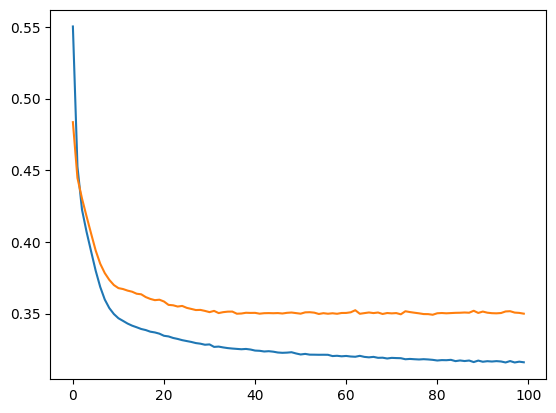

In [105]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])

**Accuracy Plot**

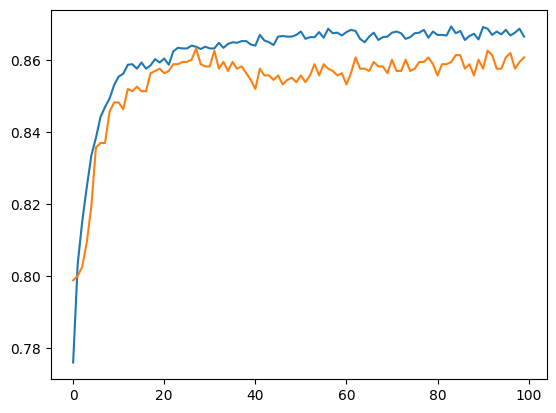

In [107]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])